<a href="https://colab.research.google.com/github/KodumuruRaja/Dimensionality-Reduction-Algorithms/blob/main/Linear%20Discriminant%20Analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)

In [ ]:
X = data.drop("class",axis=1)

X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = data["class"]

In [ ]:
# Standardizing the features
X_trans = StandardScaler().fit_transform(X)
print(X_trans)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [ ]:
#covariance matrix
covar_matrix = LDA(n_components = 4)

covar_matrix.fit(X_trans,y)

variance = covar_matrix.explained_variance_ratio_

In [ ]:
#Cumulative sum of variance
var=np.cumsum(np.round(variance, decimals=3)*100)
print(var)

[ 99.1 100. ]


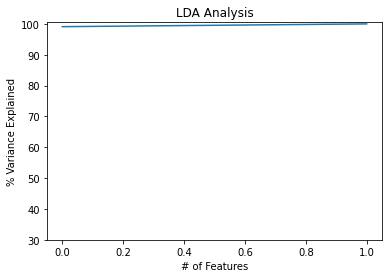

In [ ]:
#plot for variance explained
plt.ylabel("% Variance Explained")
plt.xlabel("# of Features")
plt.title("LDA Analysis")
plt.ylim(30,100.5)
plt.style.context("seaborn-whitegrid")
plt.plot(var)
plt.show()

In [ ]:
#Fit LDA for two components
lda = LDA(n_components = 2)
LinearComponents = lda.fit_transform(X_trans, y)

In [ ]:
#make it as data frame
finalDf = pd.DataFrame(data = LinearComponents, columns = ["linear discriminant 1", "linear discriminant 2"])
finalDf.head()

,linear discriminant 1,linear discriminant 2
0,8.084953,0.328454
1,7.147163,-0.755473
2,7.511378,-0.238078
3,6.837676,-0.642885
4,8.157814,0.540639


In [ ]:
#data visualizations

def visual(df):
  np.random.seed(1)
  sample_size = 5
  df = finalDf.sample(sample_size)
  plt.figure(figsize=(8,5))
  sns.distplot(finalDf["linear discriminant 1"], hist = True, kde = False,kde_kws = {"linewidth": 3})
  plt.show()
  visual(finalDf)

In [ ]:
def visual1(df):
  np.random.seed(1)
  sample_size = 5
  plt.figure(figsize=(8,5))
  sns.distplot(finalDf["linear discriminant 2"], hist = True, kde=False,
  bins=int(180/5), color = "blue",
  hist_kws={"edgecolor":'black'})
  plt.show()

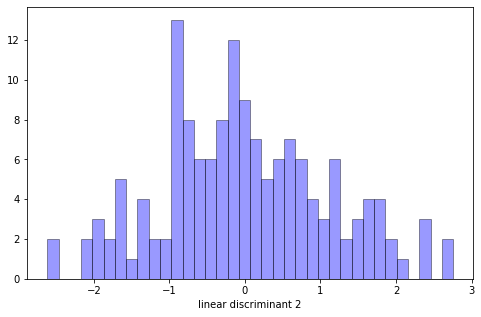

In [ ]:
visual1(finalDf)

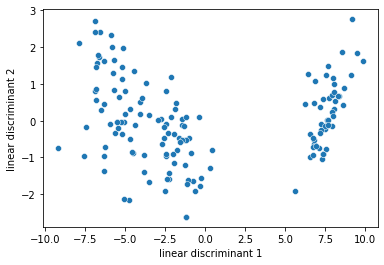

In [ ]:
#scatter plot
ax = sns.scatterplot(x="linear discriminant 1", y="linear discriminant 2", data=finalDf)
plt.show()

In [ ]:
print("The explained variance percentage is:",lda.explained_variance_ratio_*100)

The explained variance percentage is: [99.14724757  0.85275243]
